In [45]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import traffic

EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

# Small dataset

In [3]:
images, labels = traffic.load_data('gtsrb-small')
n_classes = len(np.unique(np.array(labels)))
print(np.array(images).shape)
print(np.array(labels).shape)
print(n_classes)

(840, 30, 30, 3)
(840,)
3


In [4]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=123)
X_train = X_train / 255
X_test = X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(672, 30, 30, 3)
(168, 30, 30, 3)
(672, 3)
(168, 3)


In [5]:
def evaluate_model(model, X_test, y_test, flatten=False):
    #Evaluate model
    X_t = X_test.reshape((X_test.shape[0], -1)) if flatten else X_test
    y_t = y_test
    test_loss, test_acc = model.evaluate(X_t, y_t)
    print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

In [67]:
def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim((0.7, 1))
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim((0, 0.3))
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## MLP, no convolution

In [7]:
def build_model_1(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add a hidden layer with 8 units, with ReLU activation
    model.add(Dense(8, input_shape=(img_width * img_height * 3,), activation="relu"))
    # Add output layer with 3 unit, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [8]:
def build_model_2(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add a hidden layer with 32 units, with ReLU activation
    model.add(Dense(128, input_shape=(img_width * img_height * 3,), activation="relu"))
    # Add output layer with 3 unit, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [9]:
def build_model_3(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add a 3 hidden layers with 32 units, with ReLU activation
    model.add(Dense(128, input_shape=(img_width * img_height * 3,), activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    # Add output layer with 3 unit, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [10]:
np.random.seed(123)        
tf.random.set_seed(123)

model_1 = build_model_1(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_1 = model_1.fit(
    x=X_train.reshape((X_train.shape[0], -1)),
    y=y_train,
    epochs=20,
    batch_size=23,
    validation_split=0.2,
    shuffle=False,
    verbose=1
) 

Epoch 1/20
24/24 [==============================] - 0s 20ms/step - loss: 0.6529 - accuracy: 0.6723 - val_loss: 0.3052 - val_accuracy: 0.8148
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 0.3590 - accuracy: 0.8268 - val_loss: 0.1953 - val_accuracy: 0.9852
Epoch 3/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1624 - accuracy: 0.9795 - val_loss: 0.0895 - val_accuracy: 1.0000
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.9851 - val_loss: 0.0676 - val_accuracy: 0.9926
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0638 - accuracy: 0.9907 - val_loss: 0.0540 - val_accuracy: 0.9926
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9981 - val_loss: 0.0449 - val_accuracy: 0.9926
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9981 - val_loss: 0.0395 - val_accuracy: 0.9926
Epoch 8/20
24/24 [=

In [11]:
evaluate_model(model_1, X_test, y_test, flatten=True)

6/6 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
The loss on the test set is 0.0072 and the accuracy is 100.000%


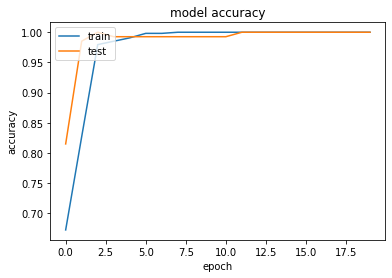

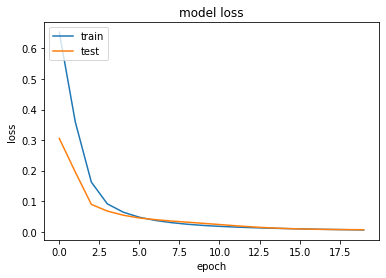

In [12]:
plot_history(history_1)

In [13]:
np.random.seed(123)        
tf.random.set_seed(123)

model_2 = build_model_2(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_2 = model_2.fit(
    x=X_train.reshape((X_train.shape[0], -1)),
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
) 

Epoch 1/20
17/17 [==============================] - 0s 23ms/step - loss: 0.6521 - accuracy: 0.7952 - val_loss: 0.1044 - val_accuracy: 0.9778
Epoch 2/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1094 - accuracy: 0.9814 - val_loss: 0.0904 - val_accuracy: 0.9926
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0574 - accuracy: 0.9888 - val_loss: 0.0643 - val_accuracy: 0.9926
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.9926 - val_loss: 0.0499 - val_accuracy: 0.9926
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9926
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9926
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9926
Epoch 8/20
17/17 [=

In [14]:
evaluate_model(model_2, X_test, y_test, flatten=True)

6/6 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000
The loss on the test set is 0.0041 and the accuracy is 100.000%


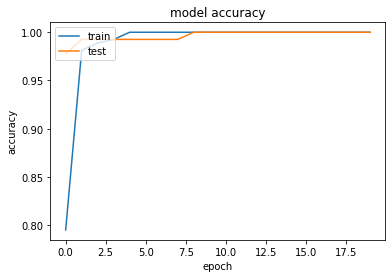

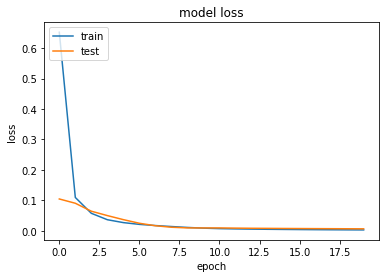

In [15]:
plot_history(history_2)

In [16]:
np.random.seed(123)        
tf.random.set_seed(123)

model_3 = build_model_3(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_3 = model_3.fit(
    x=X_train.reshape((X_train.shape[0], -1)),
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
) 

Epoch 1/20
17/17 [==============================] - 1s 37ms/step - loss: 0.5199 - accuracy: 0.8063 - val_loss: 0.1944 - val_accuracy: 0.9778
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0906 - accuracy: 0.9832 - val_loss: 0.0664 - val_accuracy: 0.9926
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0364 - accuracy: 0.9926 - val_loss: 0.0268 - val_accuracy: 0.9926
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 0.9926
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 0.9926
Epoch 6/20
17/17 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9926
Epoch 7/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9926
Epoch 8/20
17/1

In [17]:
evaluate_model(model_3, X_test, y_test, flatten=True)

6/6 [==============================] - 0s 3ms/step - loss: 5.4771e-04 - accuracy: 1.0000
The loss on the test set is 0.0005 and the accuracy is 100.000%


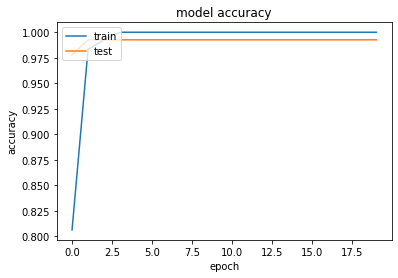

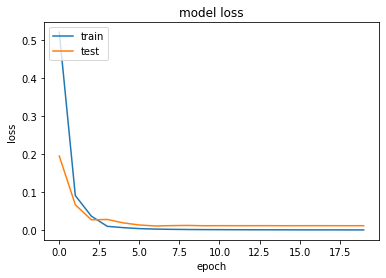

In [18]:
plot_history(history_3)

## Add convolution layers

In [19]:
def build_model_4(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add convolutional layer with 32 filters using 3x3 kernel
    model.add(Conv2D(32, (3,3), activation="relu",  input_shape=(img_width, img_height, 3)))
    # Add max-pooling layer using 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten
    model.add(Flatten())
    # Add a 1 hidden layers with 128 units, with ReLU activation
    model.add(Dense(128, activation="relu"))
    # Add output layer, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [20]:
np.random.seed(123)        
tf.random.set_seed(123)

model_4 = build_model_4(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_4 = model_4.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
) 

Epoch 1/10
17/17 [==============================] - 1s 66ms/step - loss: 0.3731 - accuracy: 0.8715 - val_loss: 0.0478 - val_accuracy: 0.9926
Epoch 2/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0269 - accuracy: 0.9963 - val_loss: 0.0112 - val_accuracy: 0.9926
Epoch 3/10
17/17 [==============================] - 1s 32ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9926
Epoch 4/10
17/17 [==============================] - 1s 36ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 5/10
17/17 [==============================] - 1s 35ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 1s 32ms/step - loss: 8.3146e-04 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 8/1

In [21]:
evaluate_model(model_4, X_test, y_test)

6/6 [==============================] - 0s 7ms/step - loss: 8.7083e-04 - accuracy: 1.0000
The loss on the test set is 0.0009 and the accuracy is 100.000%


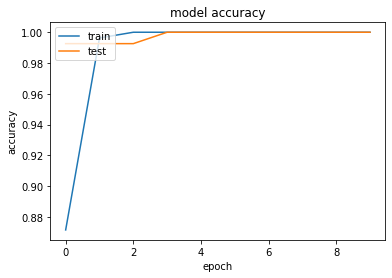

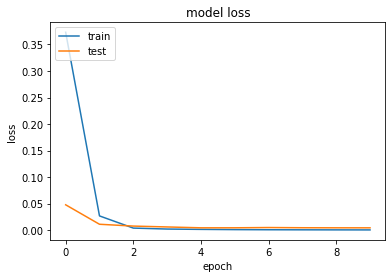

In [22]:
plot_history(history_4)

# Large dataset

In [23]:
images, labels = traffic.load_data('gtsrb')
n_classes = len(np.unique(np.array(labels)))
print(np.array(images).shape)
print(np.array(labels).shape)
print(n_classes)

(26640, 30, 30, 3)
(26640,)
43


In [24]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=TEST_SIZE, random_state=123)
X_train = X_train / 255
X_test = X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15984, 30, 30, 3)
(10656, 30, 30, 3)
(15984, 43)
(10656, 43)


### Use model_4 first

In [25]:
np.random.seed(123)        
tf.random.set_seed(123)

model_4_large = build_model_4(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_4_large = model_4_large.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
) 

Epoch 1/10
400/400 [==============================] - 15s 38ms/step - loss: 1.8143 - accuracy: 0.5306 - val_loss: 0.8211 - val_accuracy: 0.7726
Epoch 2/10
400/400 [==============================] - 15s 36ms/step - loss: 0.5259 - accuracy: 0.8631 - val_loss: 0.4887 - val_accuracy: 0.8621
Epoch 3/10
400/400 [==============================] - 15s 38ms/step - loss: 0.2674 - accuracy: 0.9324 - val_loss: 0.3892 - val_accuracy: 0.8930
Epoch 4/10
400/400 [==============================] - 15s 37ms/step - loss: 0.1620 - accuracy: 0.9643 - val_loss: 0.2605 - val_accuracy: 0.9412
Epoch 5/10
400/400 [==============================] - 15s 38ms/step - loss: 0.1079 - accuracy: 0.9769 - val_loss: 0.2012 - val_accuracy: 0.9540
Epoch 6/10
400/400 [==============================] - 15s 36ms/step - loss: 0.0796 - accuracy: 0.9834 - val_loss: 0.2030 - val_accuracy: 0.9568
Epoch 7/10
400/400 [==============================] - 15s 36ms/step - loss: 0.0583 - accuracy: 0.9867 - val_loss: 0.1965 - val_accuracy:

In [27]:
evaluate_model(model_4_large, X_test, y_test)

333/333 [==============================] - 4s 13ms/step - loss: 0.1931 - accuracy: 0.9585
The loss on the test set is 0.1931 and the accuracy is 95.852%


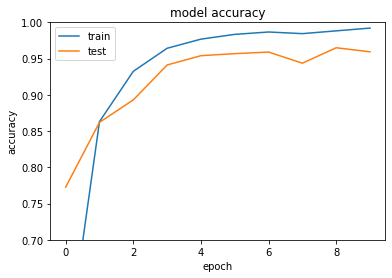

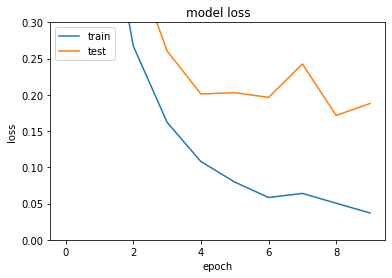

In [72]:
plot_history(history_4_large)

## Add dropout, increase number of epochs

In [32]:
def build_model_5(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add convolutional layer with 32 filters using 3x3 kernel
    model.add(Conv2D(32, (3,3), activation="relu",  input_shape=(img_width, img_height, 3)))
    # Add max-pooling layer using 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten
    model.add(Flatten())
    # Add a 1 hidden layers with 128 units, with ReLU activation + add 25% dropout
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.25))
    # Add output layer, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [37]:
np.random.seed(123)        
tf.random.set_seed(123)

model_5_large = build_model_5(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_5_large = model_5_large.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
) 

Epoch 1/20
400/400 [==============================] - 16s 40ms/step - loss: 2.1229 - accuracy: 0.4370 - val_loss: 1.0389 - val_accuracy: 0.7382
Epoch 2/20
400/400 [==============================] - 15s 38ms/step - loss: 0.8440 - accuracy: 0.7606 - val_loss: 0.4929 - val_accuracy: 0.8780
Epoch 3/20
400/400 [==============================] - 15s 39ms/step - loss: 0.5142 - accuracy: 0.8543 - val_loss: 0.3264 - val_accuracy: 0.9221
Epoch 4/20
400/400 [==============================] - 16s 41ms/step - loss: 0.3647 - accuracy: 0.8979 - val_loss: 0.2721 - val_accuracy: 0.9324
Epoch 5/20
400/400 [==============================] - 16s 40ms/step - loss: 0.2787 - accuracy: 0.9221 - val_loss: 0.2241 - val_accuracy: 0.9490
Epoch 6/20
400/400 [==============================] - 16s 40ms/step - loss: 0.2295 - accuracy: 0.9327 - val_loss: 0.1943 - val_accuracy: 0.9534
Epoch 7/20
400/400 [==============================] - 16s 40ms/step - loss: 0.1979 - accuracy: 0.9421 - val_loss: 0.1702 - val_accuracy:

In [38]:
evaluate_model(model_5_large, X_test, y_test)

333/333 [==============================] - 5s 14ms/step - loss: 0.1661 - accuracy: 0.9681
The loss on the test set is 0.1661 and the accuracy is 96.809%


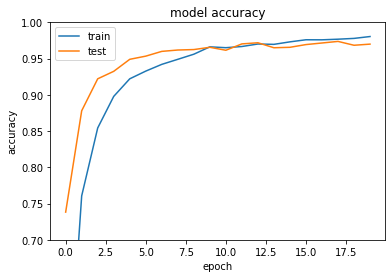

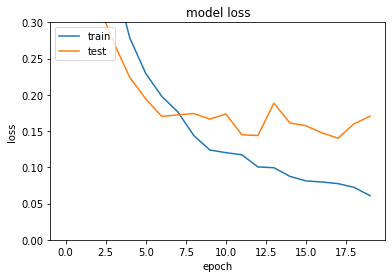

In [71]:
plot_history(history_5_large)

## Increase dropout

In [40]:
def build_model_6(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add convolutional layer with 32 filters using 3x3 kernel
    model.add(Conv2D(32, (3,3), activation="relu",  input_shape=(img_width, img_height, 3)))
    # Add max-pooling layer using 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten
    model.add(Flatten())
    # Add a 1 hidden layers with 128 units, with ReLU activation + add 50% dropout
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.50))
    # Add output layer, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [41]:
np.random.seed(123)        
tf.random.set_seed(123)

model_6_large = build_model_6(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_6_large = model_6_large.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
)

Epoch 1/20
400/400 [==============================] - 17s 43ms/step - loss: 2.4973 - accuracy: 0.3346 - val_loss: 1.3541 - val_accuracy: 0.6365
Epoch 2/20
400/400 [==============================] - 18s 44ms/step - loss: 1.2877 - accuracy: 0.6163 - val_loss: 0.6620 - val_accuracy: 0.8361
Epoch 3/20
400/400 [==============================] - 17s 42ms/step - loss: 0.8867 - accuracy: 0.7301 - val_loss: 0.4507 - val_accuracy: 0.8924
Epoch 4/20
400/400 [==============================] - 16s 40ms/step - loss: 0.6988 - accuracy: 0.7822 - val_loss: 0.3405 - val_accuracy: 0.9221
Epoch 5/20
400/400 [==============================] - 16s 39ms/step - loss: 0.5836 - accuracy: 0.8186 - val_loss: 0.2899 - val_accuracy: 0.9340
Epoch 6/20
400/400 [==============================] - 15s 38ms/step - loss: 0.5061 - accuracy: 0.8392 - val_loss: 0.2298 - val_accuracy: 0.9456
Epoch 7/20
400/400 [==============================] - 15s 39ms/step - loss: 0.4538 - accuracy: 0.8594 - val_loss: 0.2169 - val_accuracy:

In [42]:
evaluate_model(model_6_large, X_test, y_test)

333/333 [==============================] - 4s 13ms/step - loss: 0.1248 - accuracy: 0.9699
The loss on the test set is 0.1248 and the accuracy is 96.988%


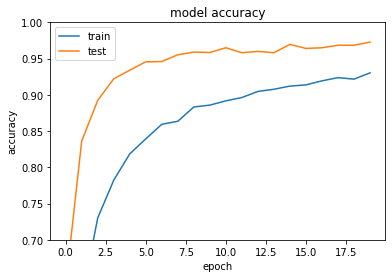

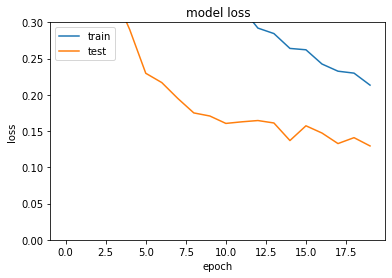

In [70]:
plot_history(history_6_large)

## Add more hidden layers, more units, increse epochs, add early stopping

In [46]:
def build_model_7(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add convolutional layer with 32 filters using 3x3 kernel
    model.add(Conv2D(32, (3,3), activation="relu",  input_shape=(img_width, img_height, 3)))
    # Add max-pooling layer using 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten
    model.add(Flatten())
    # Add a 3 hidden layers with 256/128/64 units, with ReLU activation + add 50/50/25% dropout
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.50))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.50))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.25))
    # Add output layer, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [48]:
np.random.seed(123)        
tf.random.set_seed(123)


# define the early stopping callback
es_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5
)

model_7_large = build_model_7(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_7_large = model_7_large.fit(
    x=X_train,
    y=y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    callbacks=[es_callback],
    verbose=1
)

Epoch 1/40
400/400 [==============================] - 19s 47ms/step - loss: 3.0883 - accuracy: 0.1566 - val_loss: 1.9307 - val_accuracy: 0.4410
Epoch 2/40
400/400 [==============================] - 20s 49ms/step - loss: 2.0001 - accuracy: 0.3729 - val_loss: 1.3979 - val_accuracy: 0.5627
Epoch 3/40
400/400 [==============================] - 19s 48ms/step - loss: 1.6245 - accuracy: 0.4765 - val_loss: 1.0999 - val_accuracy: 0.6675
Epoch 4/40
400/400 [==============================] - 19s 47ms/step - loss: 1.3746 - accuracy: 0.5499 - val_loss: 0.8774 - val_accuracy: 0.7291
Epoch 5/40
400/400 [==============================] - 19s 47ms/step - loss: 1.2341 - accuracy: 0.5973 - val_loss: 0.7266 - val_accuracy: 0.7729
Epoch 6/40
400/400 [==============================] - 19s 48ms/step - loss: 1.0985 - accuracy: 0.6320 - val_loss: 0.6253 - val_accuracy: 0.8036
Epoch 7/40
400/400 [==============================] - 18s 44ms/step - loss: 1.0164 - accuracy: 0.6608 - val_loss: 0.5692 - val_accuracy:

In [55]:
evaluate_model(model_7_large, X_test, y_test)

333/333 [==============================] - 5s 14ms/step - loss: 0.1673 - accuracy: 0.9645
The loss on the test set is 0.1673 and the accuracy is 96.453%


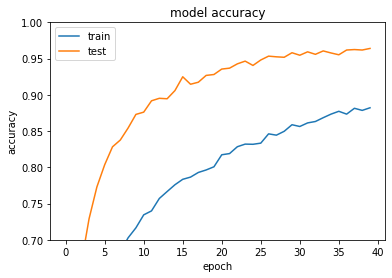

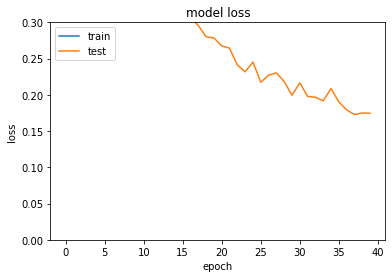

In [69]:
plot_history(history_7_large)

In [54]:
model_7_large.save('model_7_large.h5')

In [56]:
def build_model_8(img_width, img_height, n_classes):
    # Create a neural network
    model = Sequential()
    # Add convolutional layer with 32 filters using 3x3 kernel
    model.add(Conv2D(32, (3,3), activation="relu",  input_shape=(img_width, img_height, 3)))
    model.add(Conv2D(32, (3,3), activation="relu"))
    model.add(Conv2D(32, (3,3), activation="relu"))
    # Add max-pooling layer using 2x2 pool size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten
    model.add(Flatten())
    # Add a 3 hidden layers with 128/128/128 units, with ReLU activation + add 50/50/25% dropout
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.50))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.50))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.25))
    # Add output layer, with softmax activation
    model.add(Dense(n_classes, activation="softmax"))

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [57]:
np.random.seed(123)        
tf.random.set_seed(123)


# define the early stopping callback
es_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5
)

model_8_large = build_model_8(IMG_WIDTH, IMG_HEIGHT, n_classes)
history_8_large = model_8_large.fit(
    x=X_train,
    y=y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    callbacks=[es_callback],
    verbose=1
)

Epoch 1/50
400/400 [==============================] - 65s 162ms/step - loss: 2.9987 - accuracy: 0.1791 - val_loss: 1.7625 - val_accuracy: 0.4570
Epoch 2/50
400/400 [==============================] - 59s 148ms/step - loss: 1.6843 - accuracy: 0.4554 - val_loss: 1.0510 - val_accuracy: 0.6659
Epoch 3/50
400/400 [==============================] - 57s 142ms/step - loss: 1.2323 - accuracy: 0.5916 - val_loss: 0.6160 - val_accuracy: 0.8054
Epoch 4/50
400/400 [==============================] - 63s 156ms/step - loss: 1.0013 - accuracy: 0.6691 - val_loss: 0.4290 - val_accuracy: 0.8642
Epoch 5/50
400/400 [==============================] - 61s 152ms/step - loss: 0.8413 - accuracy: 0.7207 - val_loss: 0.3502 - val_accuracy: 0.8858
Epoch 6/50
400/400 [==============================] - 64s 160ms/step - loss: 0.7335 - accuracy: 0.7535 - val_loss: 0.2845 - val_accuracy: 0.9206
Epoch 7/50
400/400 [==============================] - 59s 148ms/step - loss: 0.6505 - accuracy: 0.7826 - val_loss: 0.2227 - val_ac

In [58]:
evaluate_model(model_8_large, X_test, y_test)

333/333 [==============================] - 10s 30ms/step - loss: 0.0576 - accuracy: 0.9865
The loss on the test set is 0.0576 and the accuracy is 98.649%


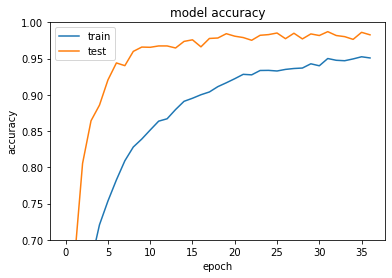

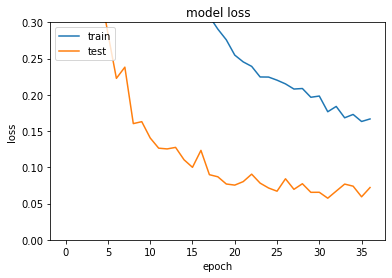

In [68]:
plot_history(history_8_large)

In [66]:
model_8_large.save('model_8_large.h5')